# BIG Hackathon: Data Preprocessing and Network Creation

In [ ]:
# imports
import matplotlib.pyplot as plt
import matplotlib.patches as mplpatches
import matplotlib as mpl
import numpy as np
import pandas as pd

In [ ]:
# mount drive to access shared data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Given Data

In [ ]:
## Loading in given data with first column set as row headers

# LA data
LA_dataset = pd.read_csv('drive/Shared drives/BIG_2020_Hackathon/Hackathon/Data/LA/LA_cities_covid_data.csv')
LA_dataset.set_index('Location ', inplace=True, drop=True)

# cities
cities_dict = {city.strip('Unincorporated - ').strip():city for city in LA_dataset.index}
rev_cities_dict = {val: key for key, val in cities_dict.items()}
cities = list(cities_dict.keys())

# dictionary of keys as corrected city name : dataframe city name 
LA_dataset = LA_dataset.rename(index=rev_cities_dict)
LA_dataset

## County Distance Data

In [ ]:
lat_long = {}
drop_cities = []

In [ ]:
# Calculating and creation of distance matrix using geopy package
#  converting from county → (lat,long) → all-to-all county distances

from geopy.distance import geodesic
from geopy.geocoders import Nominatim 
geolocator = Nominatim()

print('Iterating cities')
for city in cities:
    if city not in lat_long and city not in drop_cities:
        #print(city, len(drop_cities) + len(lat_long))
        location = geolocator.geocode(city)
        if location == None:
            drop_cities.append(city)
        else:
            print(location)
            lat, log = location.latitude, location.longitude
            if city not in lat_long:
                lat_long[city] = (lat, log)

In [ ]:
# make distance matrix
all_distances = pd.DataFrame(0, index=cities, columns=cities)

print('Making distance matrix')
for i, city_1 in enumerate(cities):
    for j, city_2 in enumerate(cities[:i]):
        if city_1 in lat_long and city_2 in lat_long:
            lat_long1 = lat_long[city_1]
            lat_long2 = lat_long[city_2]
            dist = geodesic(lat_long1, lat_long2).miles
            if dist <= 100:
                all_distances.at[city_1, city_2] = dist
                all_distances.at[city_2, city_1] = dist

# filter too sparse rows and columns (r/c with more then 90% 0)
print('Dropping sparse rows and columns')
all_distances = all_distances.loc[(all_distances==0).mean() < .9, (all_distances==0).mean() < .9]
all_distances

In [ ]:
# converting latitute, longitude dictionary into pandas dataframe and saving as csv
#distances = pd.DataFrame(lat_long.values(), index=lat_long.keys(), columns=['latitude', 'longitude'])
#distances.to_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/long_lat.csv')

# saving distances as csv
#all_distances.to_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/distance.csv')

## Reading Data

In [ ]:
# read and drop columns and rows with all 0 values
#   using saved previosly calculated data
all_distances = pd.read_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/distance.csv')
all_distances.set_index('Unnamed: 0', inplace=True, drop=True)

all_distances

## LA City Population Data

In [ ]:
la_pop = {'Avocado Heights': 15411,
 'Bradbury': 1052,
 'Canyon Country': 1084,
 'Castaic*': 19015,
 'Cerritos': 50462,
 'Charter Oak': 9310,
 'City of Agoura Hills': 20472,
 'City of Baldwin Park': 76252,
 'City of Bell Gardens': 42449,
 'City of Beverly Hills': 33775,
 'City of Bradbury': 1052,
 'City of Burbank': 105861,
 'City of Calabasas': 24193,
 'City of Cerritos': 49994,
 'City of Commerce*': 12868,
 'City of Cudahy': 24172,
 'City of Culver City': 39705,
 'City of Downey': 113529,
 'City of Hawaiian Gardens': 14649,
 'City of Hermosa Beach': 19614,
 'City of Hidden Hills': 1868,
 'City of Huntington Park': 59515,
 'City of La Habra Heights': 5461,
 'City of Lancaster*': 161699,
 'City of Lynwood*': 71269,
 'City of Malibu': 11720,
 'City of Manhattan Beach': 35250,
 'City of Palos Verdes Estates': 13404,
 'City of Rancho Palos Verdes': 41731,
 'City of Redondo Beach': 66994,
 'City of Rolling Hills': 1874,
 'City of Rolling Hills Estates': 8066,
 'City of San Dimas': 33945,
 'City of San Gabriel': 40104,
 'City of Santa Fe Springs': 18925,
 'City of Signal Hill': 11712,
 #'City of South G': 0,
 'Covina (Charter Oak)': 47963,
 'Desert View Highlands': 2360,
 'East Los Angeles': 126496,
 'East Rancho Dominguez': 15135,
 'Hacienda Heights': 54038,
 'Harbor Gateway': 54038,
 'Kagel/Lopez Canyons': 697,
 'La Habra Heights': 62183,
 'Ladera Heights': 6498,
 'Lake Hughes': 649,
 'Lake Los Angeles': 12328,
 'Lennox': 22753,
 'Leona Valley': 1607,
 'Littlerock': 1377,
 'Littlerock/Pearblossom': 2435,
 #'Los Angeles - Als': 0,
 'Los Angeles - Angelino Heights': 18166,
 'Los Angeles - Baldwin Hills': 30478,
 'Los Angeles - Boyle Heights*': 84554,
 'Los Angeles - Canoga Park': 60000,
 'Los Angeles - Carthay': 4713,
 'Los Angeles - Central': 836638,
 'Los Angeles - Century City': 6326,
 'Los Angeles - Chatsworth': 41255,
 'Los Angeles - Cheviot Hills': 25429,
 'Los Angeles - Country Club Park': 6830,
 'Los Angeles - Crestview': 2843,
 'Los Angeles - Del Rey': 28586,
 'Los Angeles - Downtown*': 12199,
 'Los Angeles - Eagle Rock': 34644,
 'Los Angeles - Echo Park': 36118,
 'Los Angeles - Elysian Park': 2600,
 'Los Angeles - Elysian Valley': 8800,
 'Los Angeles - Exposition Park': 34499,
 'Los Angeles - Glassell Park': 24816,
 #'Los Angeles - Gramercy Pl': 0,
 'Los Angeles - Granada Hills': 53266,
 'Los Angeles - Green Meadows': 30000,
 'Los Angeles - Hancock Park': 29597,
 'Los Angeles - Harbor City': 36000,
 'Los Angeles - Harbor Gateway': 40169,
 'Los Angeles - Harbor Pines': 23561,
 'Los Angeles - Harvard Heights': 20706,
 'Los Angeles - Harvard Park': 7517,
 'Los Angeles - Highland Park': 23411,
 'Los Angeles - Hollywood Hills': 20982,
 'Los Angeles - Hyde Park': 34645,
 'Los Angeles - Jefferson Park': 53256,
 'Los Angeles - Lakeview T': 14460,
 'Los Angeles - Leimert Park': 11374,
 'Los Angeles - Lincoln Heights': 25651,
 'Los Angeles - Los Feliz': 44686,
 'Los Angeles - Mid-city': 146100,
 'Los Angeles - Mission Hills': 15056,
 'Los Angeles - North Hills': 66590,
 'Los Angeles - Pacific Palisades': 28000,
 'Los Angeles - Palms': 42545,
 'Los Angeles - Panorama City': 70686,
 'Los Angeles - Playa Del Rey': 16230,
 'Los Angeles - Porter Ranch': 30571,
 'Los Angeles - Rancho Park': 25429,
# 'Los Angeles - Res': 0,
 'Los Angeles - Reseda Ranch': 80524,
 'Los Angeles - San Pedro*': 73264,
 'Los Angeles - Shadow Hills': 31025,
 'Los Angeles - Sherman Oaks': 70176,
 'Los Angeles - South Carthay': 5120,
 'Los Angeles - South Park': 34856,
 'Los Angeles - Studio City': 38237,
 'Los Angeles - Sun Valley': 55742,
 'Los Angeles - Sylmar*': 96487,
 'Los Angeles - Temple-Beaudry': 11120,
 'Los Angeles - University Hills': 5093,
 'Los Angeles - University Park': 23493,
 'Los Angeles - Van Nuys': 93258,
 'Los Angeles - Vermont Knolls': 21856,
 'Los Angeles - Vernon Central': 112,
 'Los Angeles - Victoria Park': 2444,
 'Los Angeles - Watts': 34830,
 'Los Angeles - West Adams': 11961,
 'Los Angeles - West Hills': 41426,
 'Los Angeles - West Los Angeles': 42797,
 'Los Angeles - Wilshire C': 65232,
 'Los Angeles - Woodland Hills': 69044,
 'Marina del Rey': 8866,
 'Northeast San Gabriel': 14874,
 'Quartz Hill': 10912,
 'Rancho Dominguez': 15135,
 'Rowland Heights': 48993,
 'San Pasqual': 2041,
 'Santa Monica Mountains': 8929,
 'South San Gabriel': 8070,
 'Stevenson Ranch': 17557,
 'View Park/Windsor Hills': 11075,
 'Walnut Park': 15966,
 'West Chatsworth': 41309,
 'West Puente Valley': 22636,
 'West Rancho Dominguez': 5669,
 'Whittier Narrows': 22624,
 'Willowbrook': 35983}


In [ ]:
la_pop_df = pd.DataFrame.from_dict(la_pop, orient='index')
la_pop_df = la_pop_df.rename(columns={0:'Population'})
la_pop_df

# save population as csv
#la_pop_df.to_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/final/LA_city_population.csv')

# Network Creation

## Reading distance data

In [ ]:
# read and drop columns and rows with all 0 values
#   using saved previosly calculated data
distances = pd.read_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/distance.csv')
distances.set_index('Unnamed: 0', inplace=True, drop=True)

In [ ]:
# finding invalid cities (no distance data cities)
all_cities = set(LA_dataset.index)
valid_cities = set(distances.index)
invalid_cities = all_cities.difference(valid_cities).union(valid_cities.difference(set(la_pop.keys())))

# dropping invalid cities
LA_dataset.drop(invalid_cities, inplace=True, axis=0)
distances.drop(invalid_cities, inplace=True, axis=0)
distances.drop(invalid_cities, inplace=True, axis=1)

LA_dataset

## Create network

In [ ]:
import networkx as nx

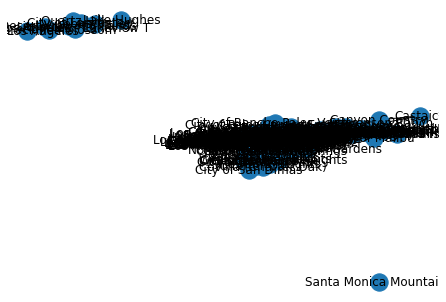

In [ ]:
# all to all dictionary if close enough by thershold
cities = distances.index
threshold = 10

# creating network
G=nx.Graph()
G.add_nodes_from(cities)

for i, city_1 in enumerate(cities):
    for j, city_2 in enumerate(cities):
        if city_1 != city_2:
            dist = distances.at[city_1, city_2]
            if dist <= threshold:
                edge = (city_1, city_2)
                G.add_edge(*edge)

nx.draw(G, with_labels = True)
#nx.draw(G)
plt.show()

## Calculating Severe Factor


severe_factor = sum( connected nodes' cases / connected nodes' population )  

* a node is connected if close distance is less than threshold


In [ ]:
def case_ratio(city):
    ''' Returns pandas series of cases/population across time points'''
    city_population = la_pop[city]
    city_cases = LA_dataset.loc[city]
    ratio = city_cases / city_population
    return ratio

In [ ]:
dates = list(LA_dataset.columns.values)
scaling_factor = 100
dist_threshold = 5

In [ ]:
# make pandas dataframe for severity factors
severity_df = pd.DataFrame(0, index=cities, columns=dates)

for city in cities:
    for city, adj_city in list(G.edges(city)):
        dist = distances.at[city, adj_city] + 1

        # add current city ratio
        #city_case_ratio_dist_corrected = case_ratio(adj_city) / dist_threshold
        #severity_df.loc[city] += city_case_ratio_dist_corrected

        if dist <= dist_threshold:
            adj_case_ratio_dist_corrected = case_ratio(adj_city) / dist

            # add adj_case_ratio_dist_corrected to severity_df
            severity_df.loc[city] += adj_case_ratio_dist_corrected
            
severity_df = severity_df*scaling_factor
severity_df

# save county severity data as csv
#severity_df.to_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/LA_city_severity.csv')

In [ ]:
# saving final data

# valid cities
#LA_dataset.to_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/final/LA_cities_cases.csv')

# severity data
#severity_df.to_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/final/LA_cities_severity.csv')

## Network Plots and Visualizations

In [ ]:
valid_counties_list = list(valid_counties) # all valid counties

# counties we want to predict
desired_counties = ["Los Angeles, California" , 
                    "San Diego, California", 
                    "Santa Cruz, California" , 
                    "Baltimore, Maryland" , 
                    "Houston, Texas"]

threshold = 80 # distance threshold in miles to create edge

# create network graph of counties:
#   edges represent airplane routes data and within threshold distance

G=nx.Graph()
G.add_nodes_from(counties)

for i, county_1 in enumerate(desired_counties):
    for j, county_2 in enumerate(valid_counties_list):
        dist = distances.at[county_1, county_2]
        if dist <= threshold:
            edge = (county_1, county_2)
            G.add_edge(*edge)

for county in valid_counties_list:
    for j, county_2 in enumerate(valid_counties_list):
        route = routes.at[county_1, county_2]
        if route:
            edge = (county_1, county_2)
            G.add_edge(*edge)

nx.draw(G, with_labels = True)
plt.show()

In [ ]:
loc = []
connections = []

for county in valid_counties_list:
    number = len(list(G.edges(county)))
    #plot_data.append((county, number))
    if number:
        loc.append(county)
        connections.append(number)

#plot_data

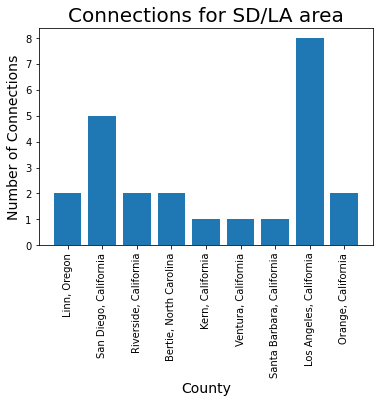

<Figure size 4800x3200 with 0 Axes>

In [ ]:

#loc = []
#connections = []

# Make a fake dataset:
#height = [3, 12, 5, 18, 45]
#bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(loc))
 
# Create bars
plt.bar(y_pos, connections)
 
# Create names on the x-axis
plt.xticks(y_pos, loc, rotation=90)
plt.xlabel('County', size=14)
plt.ylabel('Number of Connections', size=14)
plt.title('Connections for SD/LA area', size=20)
#plt.x_labels(loc)

plt.figure(dpi=800)
# Show graphic
plt.show()

In [ ]:
desired_counties

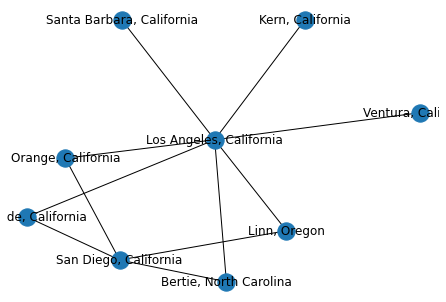

13


In [ ]:
# distance routes cases in outher counties
# calculate that for day for each county

valid_counties_list = list(valid_counties)
desired_counties = ["Los Angeles, California" , "San Diego, California", "Santa Cruz, California" ]
#desired_counties = ["Los Angeles, California" , "San Diego, California" ]

#desired_counties = ["Los Angeles, California", "San Diego, California"]


threshold = 100
connections = 0

G=nx.Graph()
G.add_nodes_from(desired_counties)

for county_1 in ["Los Angeles, California", "San Diego, California"]:
    for j, county_2 in enumerate(valid_counties_list):
        dist = distances.at[county_1, county_2]
        if dist <= threshold:
            connections += 1
            edge = (county_1, county_2)
            G.add_edge(*edge)


axes = plt.axes([0, 0, 1, 1])
nx.draw(G, with_labels = True, ax = axes)
#nx.draw(G, with_labels = True)
plt.show()

print(connections)

# Example plts

In [ ]:
import pandas as pd

In [ ]:
cases_df = pd.read_csv('drive/Shared drives/BIG_2020_Hackathon/Hackathon/Data/LA/LA_cities_covid_data.csv')
cases_df.set_index('Location ', inplace=True, drop=True)
cases_df

In [ ]:
severity_df = pd.read_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/final/LA_cities_severity.csv')
severity_df.set_index('Unnamed: 0', inplace=True, drop=True)
severity_df

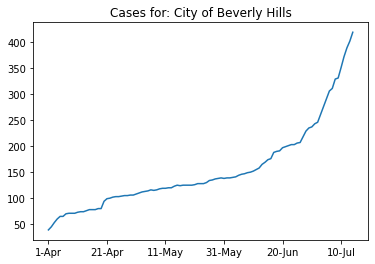

In [ ]:
#city = 'City of Baldwin Park'
city = 'City of Beverly Hills'

# plot cases
cases_plot = (cases_df.loc[city, :])
cases_plot.plot(title='Cases for: ' + city)

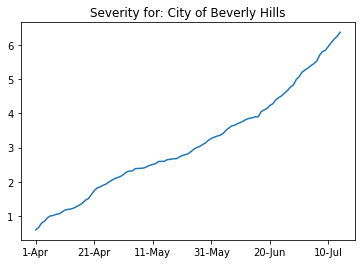

In [ ]:
# plot
severity_plot = (severity_df.loc[city, :])
severity_plot.plot(title='Severity for: ' + city)

# Heirachical clustering

In [ ]:
distances = pd.read_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/distance.csv')
distances.set_index('Unnamed: 0', inplace=True, drop=True)
#distances

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


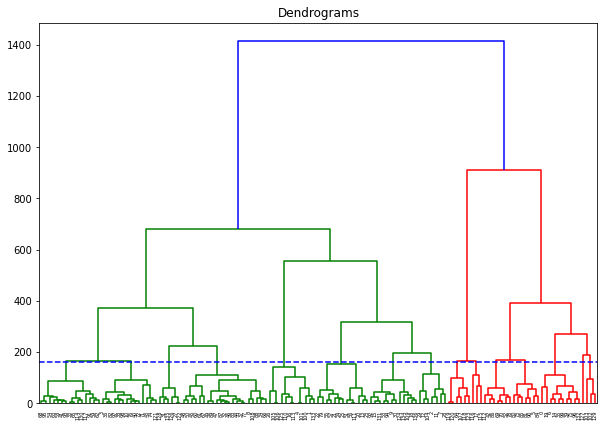

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(distances, method='ward'))
plt.axhline(y=160, color='b', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=16, affinity='euclidean', linkage='ward')  
cluster.fit_predict(distances)

In [ ]:
hcluster_city = {}

for i, city in sorted(list(zip(cluster.labels_, list(distances.index)))):
    if i not in hcluster_city:
        hcluster_city[i] = [city]
    else:
        hcluster_city[i].append(city)

hcluster_city

## Re-calculating severity factors
for heirachical cluster of cities

In [ ]:
severity_df.index

Index(['City of Agoura Hills', 'City of Baldwin Park', 'City of Bell Gardens',
       'City of Beverly Hills', 'City of Bradbury', 'City of Burbank',
       'City of Calabasas', 'City of Cerritos', 'City of Commerce*',
       'City of Cudahy',
       ...
       'Santa Monica Mountains', 'South San Gabriel', 'Stevenson Ranch',
       'View Park/Windsor Hills', 'Walnut Park', 'West Chatsworth',
       'West Puente Valley', 'West Rancho Dominguez', 'Whittier Narrows',
       'Willowbrook'],
      dtype='object', name='Unnamed: 0', length=133)

In [ ]:
severity_df = pd.read_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/final/LA_cities_severity.csv')
severity_df.set_index('Unnamed: 0', inplace=True, drop=True)
severity_df

,1-Apr,2-Apr,3-Apr,4-Apr,5-Apr,6-Apr,7-Apr,8-Apr,9-Apr,10-Apr,11-Apr,12-Apr,13-Apr,14-Apr,15-Apr,16-Apr,17-Apr,18-Apr,19-Apr,20-Apr,21-Apr,22-Apr,23-Apr,24-Apr,25-Apr,26-Apr,27-Apr,28-Apr,29-Apr,30-Apr,1-May,2-May,3-May,4-May,5-May,6-May,7-May,8-May,9-May,10-May,...,5-Jun,6-Jun,7-Jun,8-Jun,9-Jun,10-Jun,11-Jun,12-Jun,13-Jun,14-Jun,15-Jun,16-Jun,17-Jun,18-Jun,19-Jun,20-Jun,21-Jun,22-Jun,23-Jun,24-Jun,25-Jun,26-Jun,27-Jun,28-Jun,29-Jun,30-Jun,1-Jul,2-Jul,3-Jul,4-Jul,5-Jul,6-Jul,7-Jul,8-Jul,9-Jul,10-Jul,11-Jul,12-Jul,13-Jul,14-Jul
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
City of Agoura Hills,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
City of Baldwin Park,0.000000,0.000000,0.016198,0.025034,0.000000,0.000000,0.000000,0.000000,0.000000,0.016947,0.018569,0.018569,0.018569,1.463436,1.503081,1.503081,1.499836,1.537859,1.537859,1.804019,1.902171,1.922804,1.963922,1.986028,0.095909,0.059244,0.059244,0.062189,0.062189,0.063662,0.065134,0.066607,0.066607,0.068079,0.068079,0.068079,0.071174,0.077064,0.099021,0.100494,...,0.200263,0.205129,0.208074,0.211169,0.218981,0.220603,0.220454,0.229439,0.232534,0.234006,0.241818,0.241818,0.245062,0.246685,0.249779,0.273209,0.279548,0.333476,0.354691,0.398604,0.405967,0.416574,0.428504,0.442356,0.450018,0.460626,0.491867,0.511758,0.522216,0.534146,0.546077,0.578641,0.595587,0.601777,0.606194,0.613707,0.633449,0.647002,0.659381,0.688557
City of Bell Gardens,0.102259,0.125442,0.145646,0.172089,0.197556,0.210313,0.231941,0.251262,0.291665,0.171871,0.180894,0.190282,0.193190,0.209198,0.216380,0.204936,0.216737,0.227061,0.234742,0.272275,0.320025,0.355530,0.388429,0.402096,0.308513,0.429169,0.439367,0.454171,0.477033,0.501734,0.533261,0.551712,0.562798,0.566397,0.590185,0.622975,0.634613,0.663530,0.683485,0.695363,...,2.022959,2.069733,2.123294,2.146390,2.201566,2.271918,2.374395,2.483891,2.551702,2.587329,2.618645,2.696892,2.774303,2.818118,2.849103,2.945259,3.043653,3.158567,3.250086,3.291061,3.351887,3.412759,3.483305,3.584544,3.685822,3.824327,3.885309,3.977463,4.064054,4.157812,4.247727,4.342185,4.512458,4.614653,4.679900,4.786831,4.905259,5.024585,5.140165,5.301190
City of Beverly Hills,0.593580,0.667785,0.794346,0.850332,0.950312,1.002823,1.016390,1.050931,1.063269,1.119457,1.176081,1.192731,1.205928,1.232267,1.278943,1.326391,1.384374,1.464638,1.510862,1.629195,1.745092,1.823119,1.854109,1.899954,1.934806,1.996089,2.048435,2.094101,2.125784,2.160693,2.216525,2.288447,2.315647,2.321659,2.386024,2.391366,2.397233,2.406363,2.446532,2.484706,...,3.509881,3.576277,3.638489,3.656483,3.708926,3.736615,3.781722,3.831210,3.857291,3.873736,3.902503,3.901807,4.053517,4.099482,4.147645,4.231965,4.286225,4.397068,4.465149,4.516919,4.595966,4.673895,4.770864,4.834212,4.993014,5.078385,5.207627,5.273852,5.329253,5.398676,5.455401,5.534626,5.710518,5.811835,5.853216,5.966608,6.077049,6.179040,6.261520,6.376258
City of Bradbury,0.000787,0.001311,0.001836,0.002361,0.002623,0.002885,0.002885,0.003147,0.003934,0.004721,0.005770,0.006557,0.007344,0.008131,0.008918,0.009180,0.009705,0.010492,0.010754,0.011541,0.013639,0.014950,0.016262,0.017573,0.018360,0.018885,0.019147,0.020196,0.021770,0.022294,0.023344,0.024655,0.026229,0.028065,0.030425,0.032524,0.033048,0.033573,0.037770,0.039081,...,0.103079,0.10

In [ ]:
# re-calculating severity factor for cluster of cities

# make pandas dataframe for severity factors
cities = list(severity_df.index)
dates = list(cases_df.columns.values)
new_severity_df = pd.DataFrame(0, index=cities, columns=dates)

for i, cluster in enumerate(hcluster_city.values()):
    cluster_count = len(cluster)
    cluster_running_severity = 0

    for city in cluster:
        try:
            severity = severity_df.loc[city]
            cluster_running_severity += severity
        except:
            pass
    
    aggr_severity = cluster_running_severity / cluster_count
    print(cluster_count)

    for city in cluster:
        #print(city, aggr_severity)
        new_severity_df.loc[city] = aggr_severity

#severity_df = severity_df*scaling_factor
#severity_df
new_severity_df
new_severity_df.to_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/final/new_LA_cities_severity.csv')

In [ ]:
# saving final data

# valid cities
#LA_dataset.to_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/final/LA_cities_cases.csv')

# severity data
#new_severity_df.to_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/final/new_LA_cities_severity.csv')

In [ ]:
#lst = list(zip(list(distances.index), cluster.labels_))

#h_cluster_df = pd.DataFrame(lst)
#h_cluster_df.set_index(0, inplace=True, drop=True)
#h_cluster_df

#h_cluster_df.to_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/final/new_LA_cities_clusters.csv')